170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 79s 0us/step


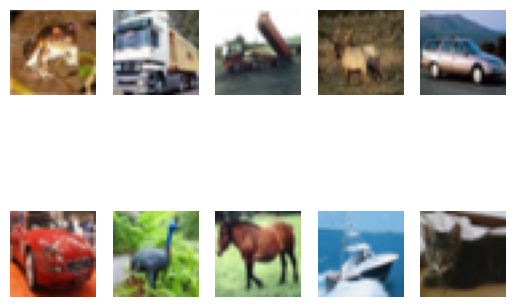

In [1]:
#Завдання 1: Згорткова нейронна мережа для CIFAR-10 (або MNIST, Fashion MNIST)
#Завантаження датасету та виведення перших 10 зображень
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


In [2]:
from tensorflow.keras.utils import to_categorical

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
#Підбір архітектури моделі
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [5]:
#Використання callback-функцій
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Графіки функції втрат і точності
# Побудова моделі
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі перед навчанням
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3052 - loss: 1.8604 - val_accuracy: 0.5207 - val_loss: 1.3297
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5064 - loss: 1.3735 - val_accuracy: 0.5868 - val_loss: 1.1553
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5794 - loss: 1.1945 - val_accuracy: 0.6480 - val_loss: 1.0025
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6262 - loss: 1.0666 - val_accuracy: 0.6531 - val_loss: 0.9718
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6578 - loss: 0.9740 - val_accuracy: 0.6922 - val_loss: 0.8776
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6846 - loss: 0.9064 - val_accuracy: 0.7021 - val_loss: 0.8625
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7103 - loss: 0.8267 - val_accuracy: 0.7172 - val_loss: 0.8254
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7223 - loss: 0.7966 - val_accuracy: 0.

In [11]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.87      0.85      0.86      1000
           2       0.65      0.61      0.63      1000
           3       0.56      0.51      0.54      1000
           4       0.66      0.75      0.70      1000
           5       0.63      0.64      0.64      1000
           6       0.79      0.82      0.80      1000
           7       0.76      0.77      0.76      1000
           8       0.87      0.80      0.84      1000
           9       0.83      0.82      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



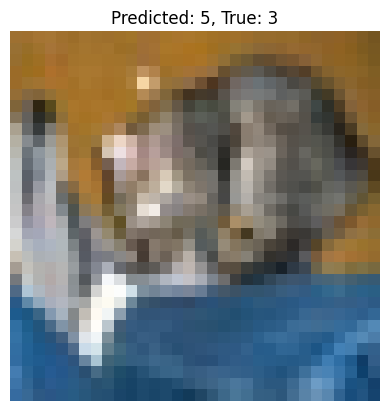

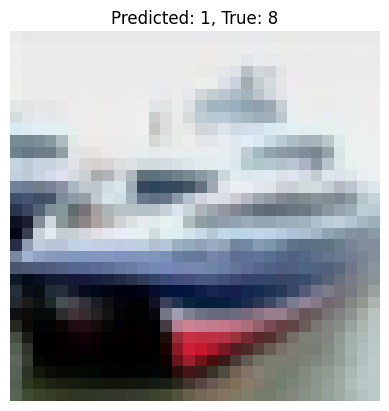

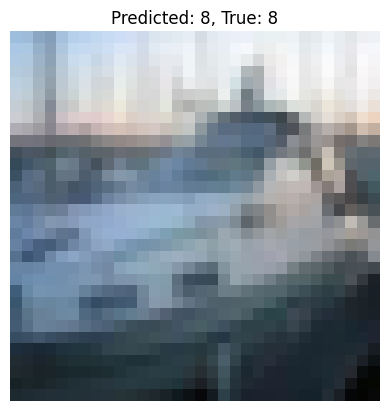

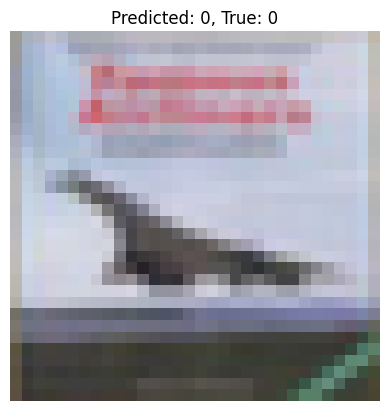

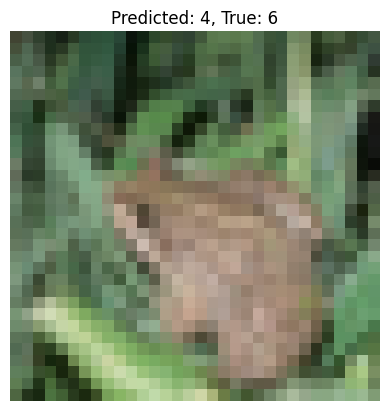

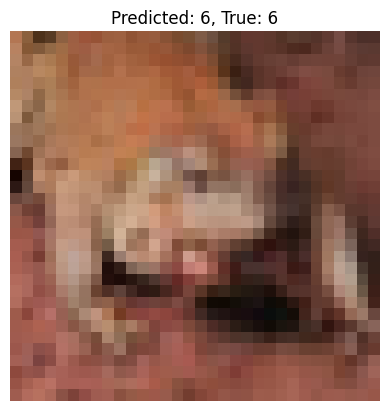

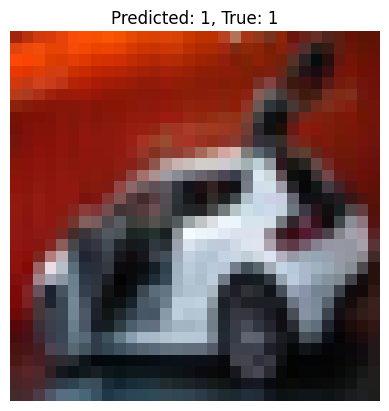

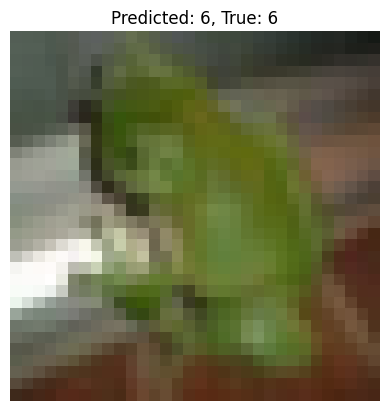

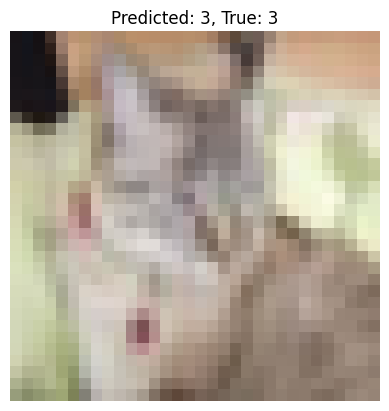

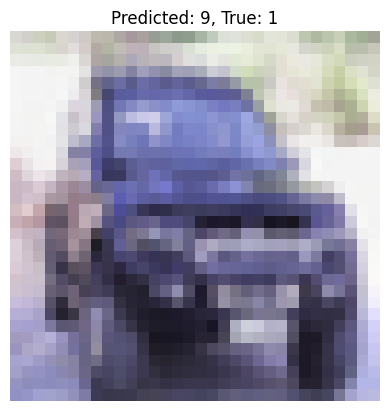

In [12]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}, True: {y_true_classes[i]}")
    plt.axis('off')
    plt.show()


In [13]:
#Завдання 2: Модель з попередньо навченими вагами (VGG16, VGG19, ResNet)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Заморожуємо шари


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [15]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# Побудова моделі
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі перед навчанням
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3049 - loss: 1.8610 - val_accuracy: 0.5380 - val_loss: 1.2862
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5279 - loss: 1.3200 - val_accuracy: 0.5937 - val_loss: 1.1472
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5962 - loss: 1.1426 - val_accuracy: 0.6470 - val_loss: 0.9973
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6480 - loss: 1.0145 - val_accuracy: 0.6677 - val_loss: 0.9480
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6769 - loss: 0.9306 - val_accuracy: 0.6625 - val_loss: 0.9499
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6998 - loss: 0.8645 - val_accuracy: 0.7142 - val_loss: 0.8326
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7223 - loss: 0.7968 - val_accuracy: 0.7153 - val_loss: 0.8230
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7449 - loss: 0.7407 - val_accuracy: 0.

In [18]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8987 - loss: 0.2731 - val_accuracy: 0.7266 - val_loss: 1.2534 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9055 - loss: 0.2595 - val_accuracy: 0.7439 - val_loss: 1.1893 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9061 - loss: 0.2545 - val_accuracy: 0.7358 - val_loss: 1.2166 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9090 - loss: 0.2486 - val_accuracy: 0.7351 - val_loss: 1.2264 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9118 - loss: 0.2435 - val_accuracy: 0.7398 - val_loss: 1.2888 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9330 - loss: 0.1825 - val_accuracy: 0.7533 - val_loss: 1.3685 - learning_rate: 5.0000e-04
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9435 - loss: 0.151

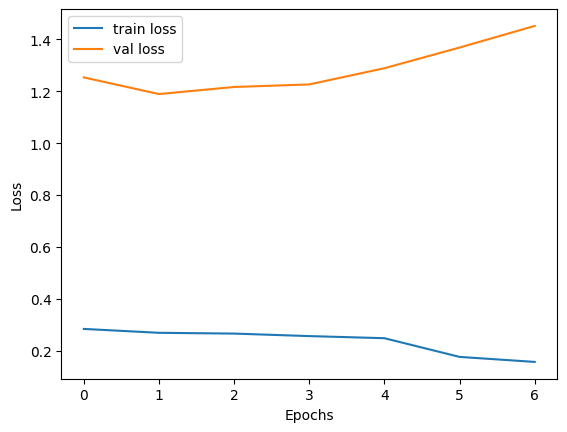

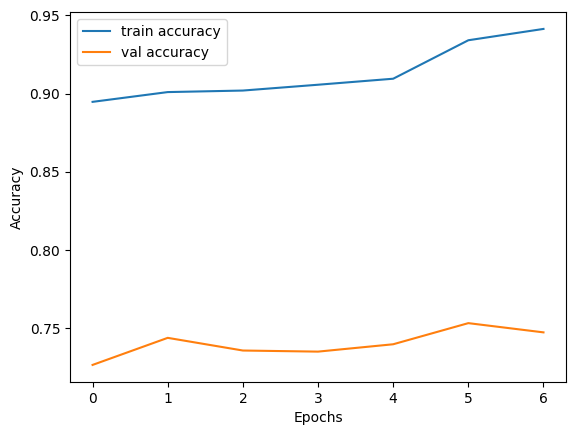

In [19]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.84      0.86      0.85      1000
           2       0.66      0.65      0.66      1000
           3       0.60      0.54      0.56      1000
           4       0.74      0.67      0.71      1000
           5       0.62      0.71      0.66      1000
           6       0.83      0.81      0.82      1000
           7       0.72      0.82      0.77      1000
           8       0.86      0.82      0.84      1000
           9       0.83      0.81      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



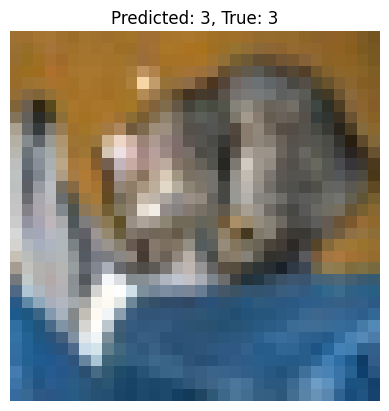

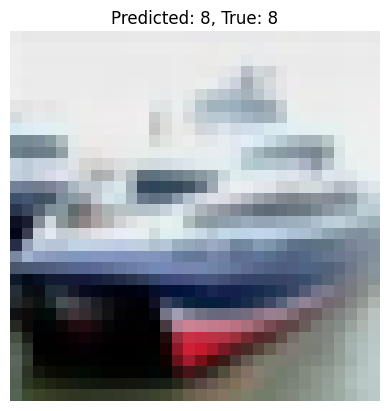

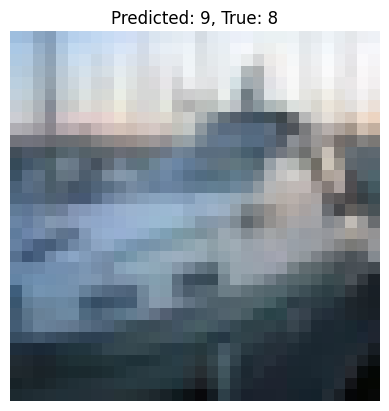

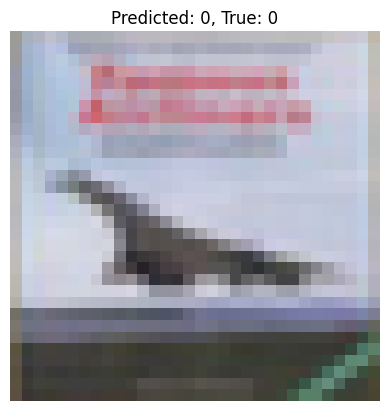

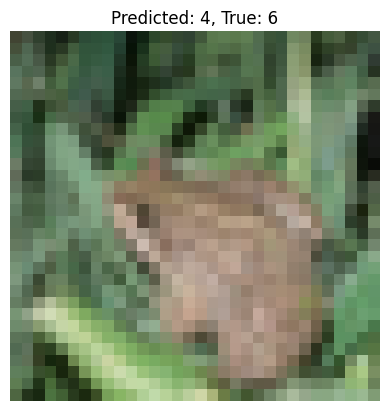

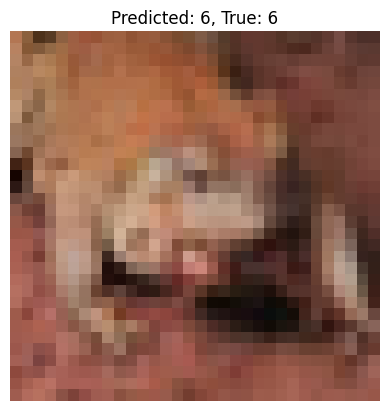

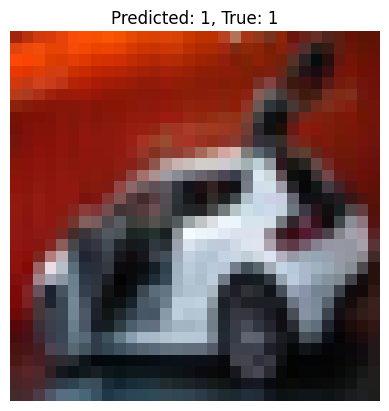

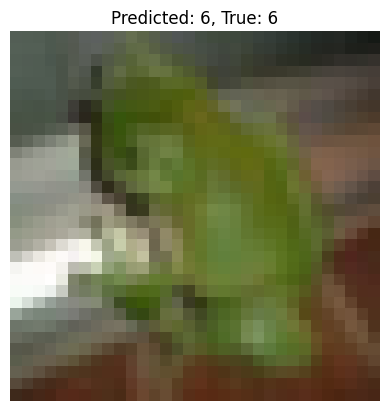

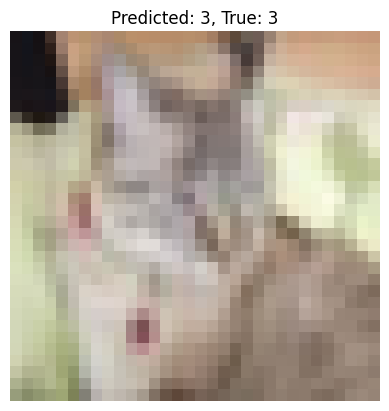

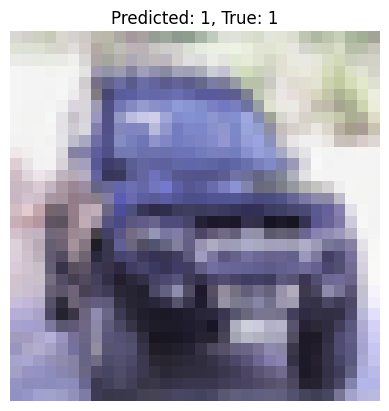

In [21]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}, True: {y_true_classes[i]}")
    plt.axis('off')
    plt.show()
